In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("liver_cirrhosis.csv")

In [44]:
# Column descriptions:
# N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
# Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
# Drug: type of drug D-penicillamine or placebo
# Age: age in days
# Sex: M (male) or F (female)
# Ascites: presence of ascites N (No) or Y (Yes)
# Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
# Spiders: presence of spiders N (No) or Y (Yes)
# Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
# Bilirubin: serum bilirubin in [mg/dl]
# Cholesterol: serum cholesterol in [mg/dl]
# Albumin: albumin in [gm/dl]
# Copper: urine copper in [ug/day]
# Alk_Phos: alkaline phosphatase in [U/liter]
# SGOT: SGOT in [U/ml]
# Tryglicerides: triglicerides in [mg/dl]
# Platelets: platelets per cubic [ml/1000]
# Prothrombin: prothrombin time in seconds [s]
# Stage: histologic stage of disease ( 1, 2, or 3 )

In [34]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [35]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [36]:
#import pandas as pd
#from pandas_profiling import ProfileReport
#ProfileReport(df)

ImportError: Numba needs NumPy 1.24 or less

In [37]:
#import pandas as pd
#from ydata_profiling import ProfileReport

ImportError: Numba needs NumPy 1.24 or less

In [45]:
df['Edema'].value_counts()

Edema
N    20220
S     3698
Y     1082
Name: count, dtype: int64

In [21]:
# Missing Values
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [22]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [23]:
df.shape

(25000, 19)

In [7]:
# Check for duplicate rows in the dataframe
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 15361


In [8]:
# Remove duplicate rows from the dataframe
df = df.drop_duplicates()

# Verify the number of rows after removing duplicates
num_rows_after_removal = df.shape[0]
print(f"Number of rows after removing duplicates: {num_rows_after_removal}")

Number of rows after removing duplicates: 9639


In [9]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000
mean,1910.982571,18429.717606,3.228571,371.706706,3.496118,97.027569,1973.572709,122.317487,123.587337,253.787605,10.713328,2.029152
std,1093.620373,3693.953156,4.512278,197.824339,0.382319,73.108854,1827.063380,47.653515,55.206301,95.740700,0.922026,0.809956
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1103.000000,15628.000000,0.800000,271.000000,3.290000,51.000000,1031.000000,89.900000,93.000000,188.000000,10.000000,1.000000
50%,1690.000000,18628.000000,1.300000,369.510563,3.520000,97.648387,1713.000000,122.556346,124.702128,249.000000,10.600000,2.000000
75%,2598.000000,20819.000000,3.300000,369.510563,3.760000,102.000000,1982.655769,134.850000,125.000000,307.000000,11.100000,3.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.000000


In [10]:
df.nunique()

N_Days           549
Status             3
Drug               2
Age              510
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        113
Cholesterol      220
Albumin          179
Copper           197
Alk_Phos         336
SGOT             240
Tryglicerides    157
Platelets        295
Prothrombin       51
Stage              3
dtype: int64

In [22]:
X= df.drop(columns=['Stage'])
Y = df['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2)

x_train['Stage'] = y_train
df = x_train

In [23]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
2716,1413,D,Placebo,16467,F,N,Y,N,N,17.4,1775.0,3.43,205.0,2065.0,165.85,97.0,151.0,10.5,2
3195,1301,CL,D-penicillamine,22797,F,Y,Y,N,S,1.1,432.0,3.57,45.0,722.0,190.00,88.0,139.0,11.4,3
3964,3428,D,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,59.0,199.0,11.7,2
15309,1769,D,D-penicillamine,20834,F,N,Y,Y,N,1.1,466.0,3.36,84.0,1787.0,328.60,185.0,117.0,11.6,3
13655,2527,C,D-penicillamine,17664,F,N,N,N,N,0.8,256.0,3.54,32.0,1132.0,74.40,94.0,192.0,10.5,2


## Descriptive Analysis

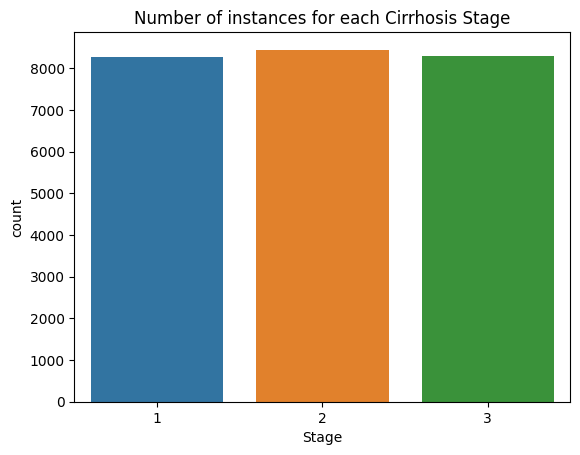

In [26]:
df['Stage'] = df['Stage'].astype('object')
sns.countplot(data = df, x = 'Stage')
plt.title('Number of instances for each Cirrhosis Stage')
plt.show()

There are almost similar numbers of instances for each stages of Cirrhosis in this dataset. So, it's pretty balanced.

In [27]:
categorical_cols = df.select_dtypes('O').columns.tolist()
numerical_cols = df.select_dtypes(exclude = 'O').columns.tolist()


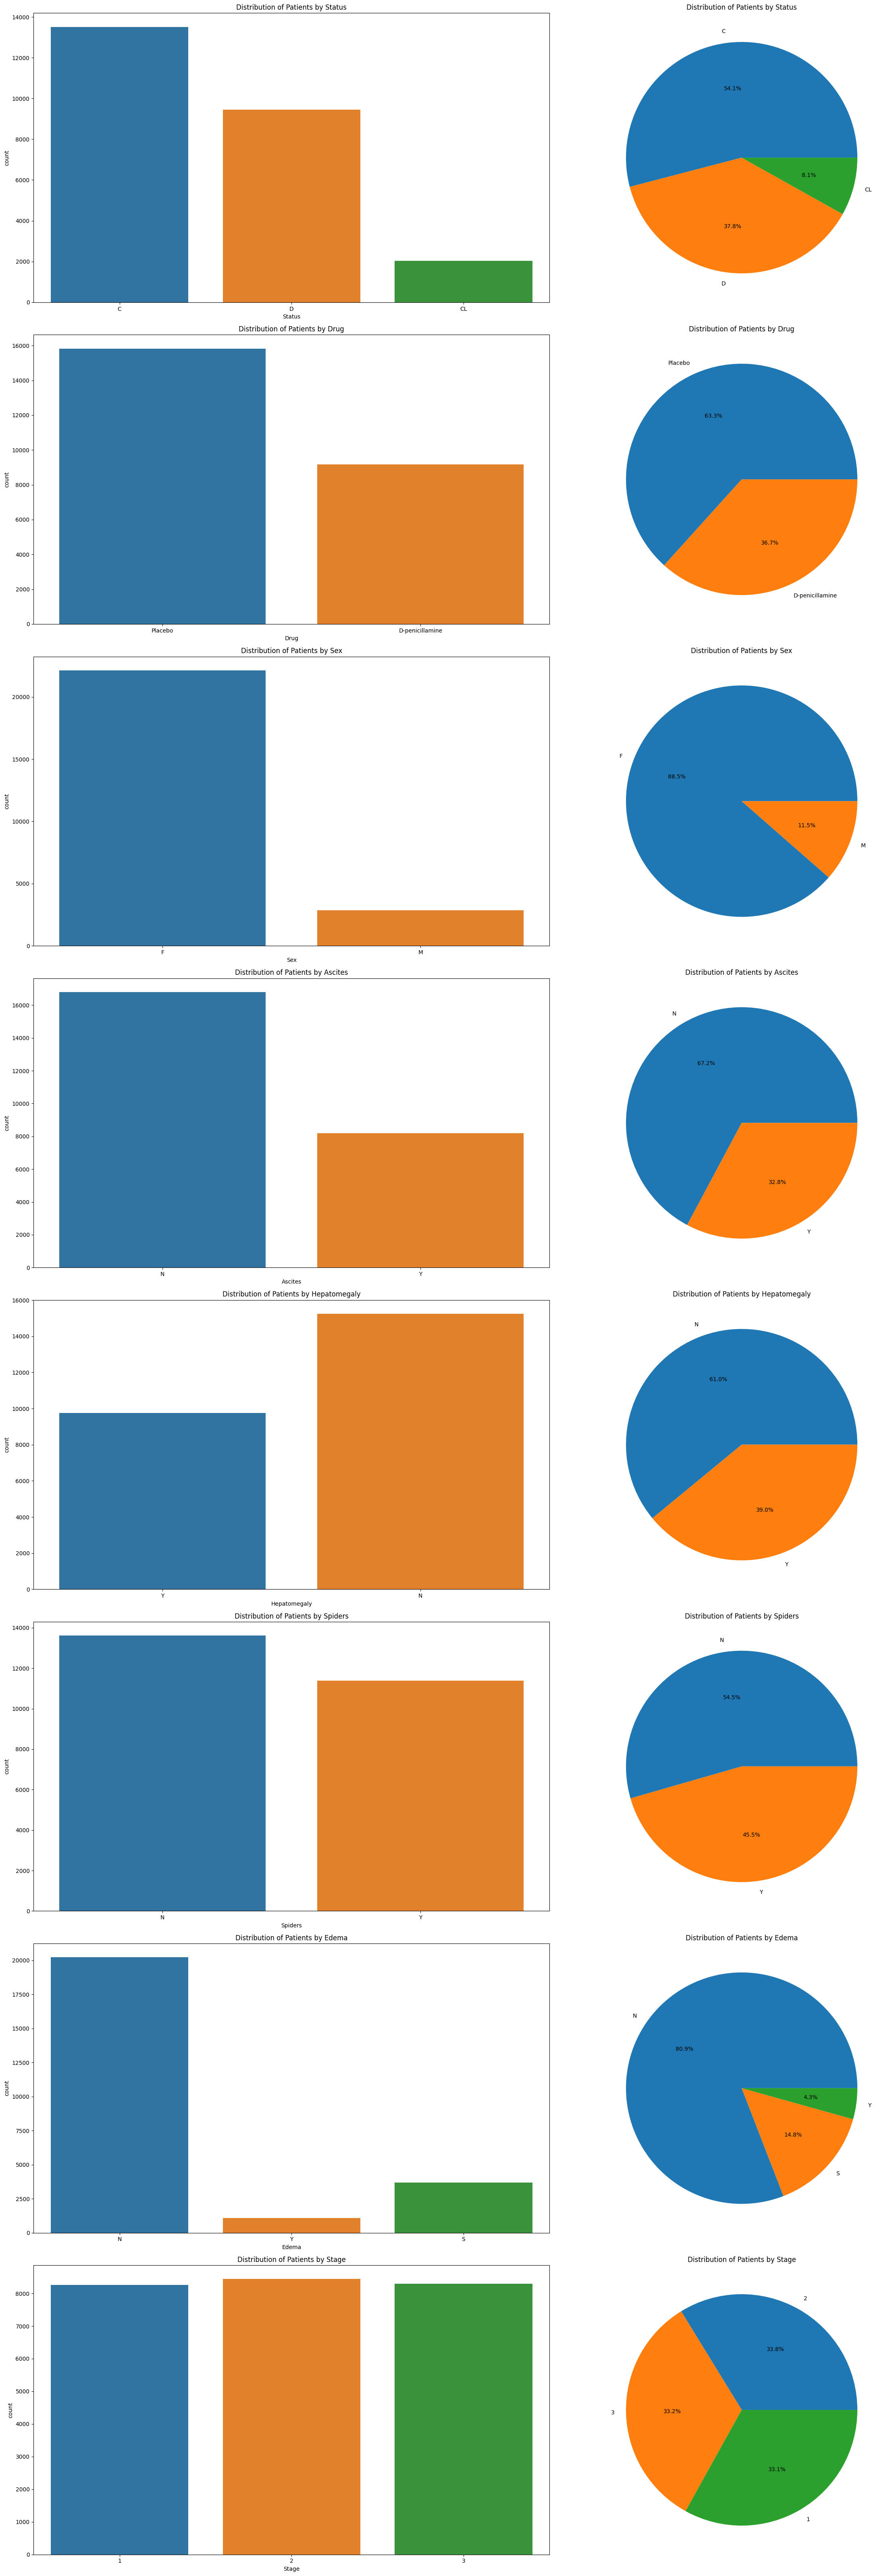

In [28]:
fig, axes = plt.subplots(nrows=round(len(categorical_cols)), ncols=2, figsize = (25,8*len(categorical_cols)))

# Iterate through each column and plot a countplot
for i, column in enumerate(categorical_cols):
   
    sns.countplot(data=df, x=column, ax=axes[i,0])
    axes[i, 0].set_title(f'Distribution of Patients by {column.capitalize()}')
    
    axes[i, 1].pie(df[column].value_counts(), autopct='%1.1f%%', labels=df[column].value_counts().index)
    axes[i, 1].set_title(f'Distribution of Patients by {column.capitalize()}')

plt.tight_layout()
plt.show()

54% of the subjects are censored, meaning the patients were alive throughout the study. Almost 38% patients died during the study, and the rest went through Liver Transplantation.

63.3% of the subjects were under Placebo treatment, and the rest were under actual Drug Treatment.

88.5% of the subjects were female, and there are very few Male subjects.

Around 67% of the subjects had Ascites and 61% don't have Hepatomegaly.

Number of subjects with Spiders is comparable to subjects without spiders, with the ratio being 55-45.

Almost 20,000 (81%) subjects don't have Edema, while around 5000 (15%) subjects have edema present without diuretics, or edema resolved by diuretics, and a very small amount have Edema regardless of diuretics.

The number of subjects across each stage is evenly balanced.

In [39]:
target = 'Stage'

cont_cols = df.select_dtypes('number').columns
cont_cols = cont_cols[cont_cols != target]

obj_cols = df.select_dtypes(object).columns

len(cont_cols), len(obj_cols)

(11, 7)

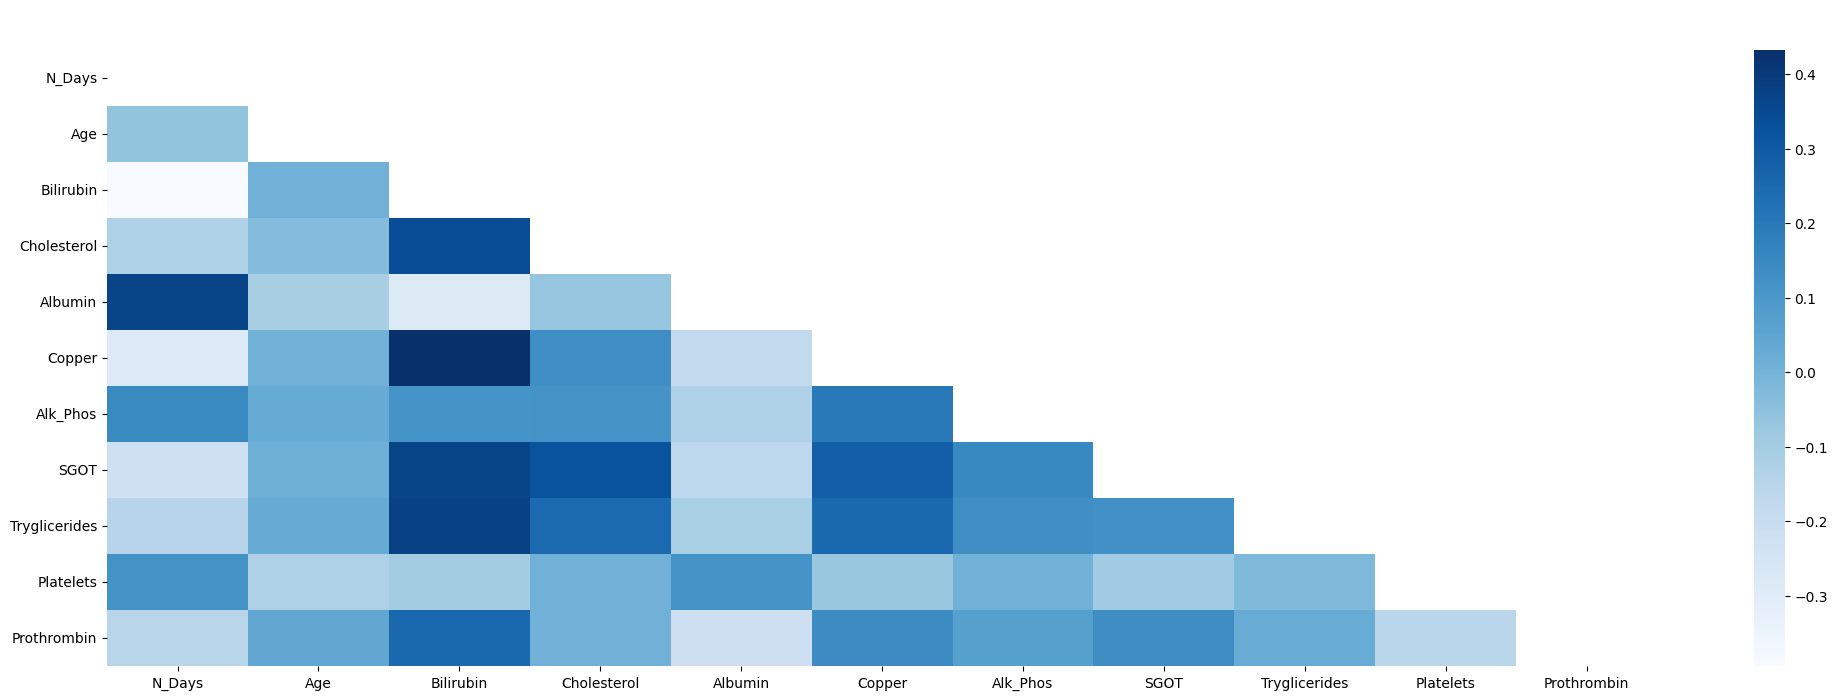

In [40]:
fig = plt.figure(figsize=(25, 8))

gs = fig.add_gridspec(1, 1)

gs.update(wspace=0.3, hspace=0.15)

ax = fig.add_subplot(gs[0, 0])

ax.set_title("Correlation Matrix", fontsize=28, fontweight='bold', fontfamily='Comic Sans MS', color="#fff")

sns.heatmap(df[cont_cols].corr().transpose(), mask=np.triu(np.ones_like(df[cont_cols].corr().transpose())), fmt=".1f", annot=True, cmap='Blues')

plt.show()

The features are not correlated to each other at all. Multicollinearity cannot be spotted.

In [60]:
numeric_df = df.select_dtypes(include=['int', 'float'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_in_years
N_Days,1.000000,-0.394799,-0.123461,0.368851,-0.281349,0.147792,-0.220532,-0.147606,0.115908,-0.149960,-0.309484,-0.060578
Bilirubin,-0.394799,1.000000,0.339106,-0.283105,0.432199,0.112972,0.368024,0.379776,-0.095162,0.254145,0.168006,0.006096
Cholesterol,-0.123461,0.339106,1.000000,-0.066418,0.129223,0.116131,0.322450,0.248305,0.008835,0.006194,0.025415,-0.035935
Albumin,0.368851,-0.283105,-0.066418,1.000000,-0.179171,-0.125686,-0.162569,-0.111661,0.118662,-0.215859,-0.231631,-0.108820
Copper,-0.281349,0.432199,0.129223,-0.179171,1.000000,0.200772,0.281353,0.253358,-0.074730,0.141349,0.131763,0.006684
Alk_Phos,0.147792,0.112972,0.116131,-0.125686,0.200772,1.000000,0.151769,0.129874,0.007922,0.072392,0.084407,0.029586
SGOT,-0.220532,0.368024,0.322450,-0.162569,0.281353,0.151769,1.000000,0.122173,-0.093752,0.133210,0.175301,0.011171
Tryglicerides,-0.147606,0.379776,0.248305,-0.111661,0.253358,0.129874,0.122173,1.000000,-0.020636,0.027211,0.079228,0.030717
Platelets,0.115908,-0.095162,0.008835,0.118662,-0.074730,0.007922,-0.093752,-0.020636,1.000000,-0.156356,-0.250058,-0.123604
Prothrombin,-0.149960,0.254145,0.006194,-0.215859,0.141349,0.072392,0.133210,0.027211,-0.156356,1.000000,0.288107,0.042141


<Axes: >

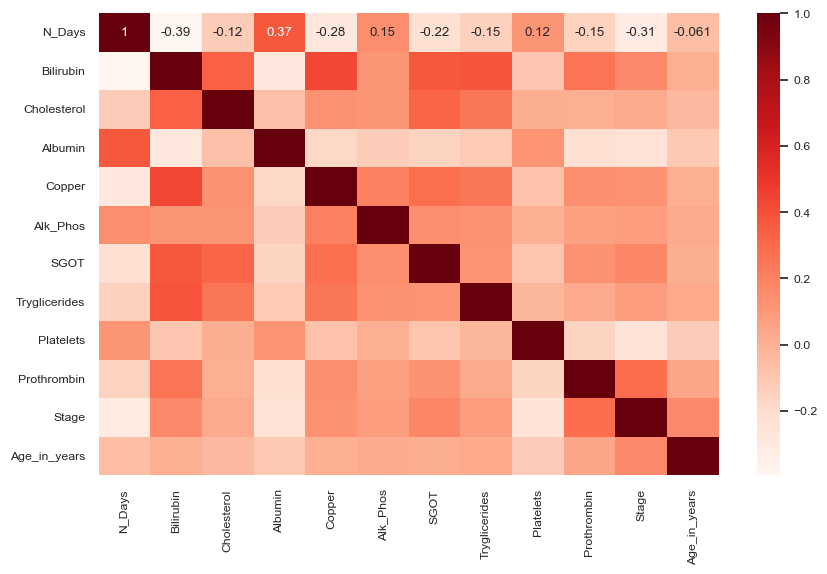

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')

In [63]:
from scipy import stats

# Im writing a function for bivalent Analysis

def bivalent(data_frame, label):
    """
    Perform bivalent analysis for each column in the given DataFrame.

    Args:
        data_frame (pd.DataFrame): The input DataFrame.
        label (str): The name of the target variable.

    Returns:
        pd.DataFrame: A summary DataFrame with statistical results for each column.
    """
         
    output_df = pd.DataFrame(columns=["p", "F", "X2", "significance"])
    for col in data_frame:
        if col is not label:
            if pd.api.types.is_numeric_dtype(data_frame[col]):
                # Numeric vs. Categorical
                groups = data_frame[label].unique()
                label_m = []
                for g in groups:
                    label_m.append(data_frame[data_frame[label] == g][col])
                f, p = stats.f_oneway(*label_m)
                
                # Determine significance level
                if p < 0.001:
                    sig = '***'
                elif p < 0.01:
                    sig = '**'
                elif p < 0.05:
                    sig = '*'
                else:
                    sig = ''
                output_df.loc[col] = [p, f, "-", sig]

            else:
                # Categorical vs. Categorical
                contingency_table = pd.crosstab(data_frame[col], data_frame[label])
                x2, p, dof, ex = stats.chi2_contingency(contingency_table)
                # Determine significance level
                if p < 0.001:
                    sig = '***'
                elif p < 0.01:
                    sig = '**'
                elif p < 0.05:
                    sig = '*'
                else:
                    sig = ''
                output_df.loc[col] = [p, '-', x2, sig]

    return output_df.sort_values(by='significance', ascending=False)



biv = bivalent(df, "Status")
biv

,p,F,X2,significance
N_Days,0.000000e+00,2364.683301,-,***
Albumin,0.000000e+00,930.361677,-,***
Stage,0.000000e+00,1030.320055,-,***
Prothrombin,0.000000e+00,941.312261,-,***
Platelets,1.406601e-51,117.640855,-,***
Tryglicerides,8.301352e-199,464.52219,-,***
SGOT,0.000000e+00,967.851986,-,***
Alk_Phos,9.473727e-155,359.73183,-,***
Copper,0.000000e+00,1526.985078,-,***
Cholesterol,1.307883e-127,295.601366,-,***


All of these variables have extremely low p-values, indicating highly significant associations with the outcome. They are likely to be important predictors or factors influencing the outcome in the analysis(i.e. determine the "Status" of the patient). With N_Days with the most significance

In [54]:
categoricals = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly",
               "Spiders", "Edema", "Stage"]

In [64]:
numericals = [i for i in df.columns if i not in categoricals]
numericals = ['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']
print(numericals)

['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age_in_years']


In [56]:
corr_num = df[numericals].corr()
corr_num.style.background_gradient(cmap='coolwarm')

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
N_Days,1.000000,-0.060569,-0.394799,-0.123461,0.368851,-0.281349,0.147792,-0.220532,-0.147606,0.115908,-0.149960
Age,-0.060569,1.000000,0.006081,-0.035932,-0.108807,0.006670,0.029575,0.011165,0.030719,-0.123611,0.042134
Bilirubin,-0.394799,0.006081,1.000000,0.339106,-0.283105,0.432199,0.112972,0.368024,0.379776,-0.095162,0.254145
Cholesterol,-0.123461,-0.035932,0.339106,1.000000,-0.066418,0.129223,0.116131,0.322450,0.248305,0.008835,0.006194
Albumin,0.368851,-0.108807,-0.283105,-0.066418,1.000000,-0.179171,-0.125686,-0.162569,-0.111661,0.118662,-0.215859
Copper,-0.281349,0.006670,0.432199,0.129223,-0.179171,1.000000,0.200772,0.281353,0.253358,-0.074730,0.141349
Alk_Phos,0.147792,0.029575,0.112972,0.116131,-0.125686,0.200772,1.000000,0.151769,0.129874,0.007922,0.072392
SGOT,-0.220532,0.011165,0.368024,0.322450,-0.162569,0.281353,0.151769,1.000000,0.122173,-0.093752,0.133210
Tryglicerides,-0.147606,0.030719,0.379776,0.248305,-0.111661,0.253358,0.129874,0.122173,1.000000,-0.020636,0.027211
Platelets,0.115908,-0.123611,-0.095162,0.008835,0.118662,-0.074730,0.007922,-0.093752,-0.020636,1.000000,-0.156356


### Encoding

In [48]:
df["Status"] = df["Status"].map({"C":0, "CL":1, "D":2})
df["Drug"] = df["Drug"].map({"Placebo":0, "D-penicillamine":1})
df["Sex"] = df["Sex"].map({"F":0, "M":1})
df["Ascites"] = df["Ascites"].map({"N":0, "Y":1})
df["Hepatomegaly"] = df["Hepatomegaly"].map({"N":0, "Y":1})
df["Spiders"] = df["Spiders"].map({"N":0, "Y":1})
df["Edema"] = df["Edema"].map({"N":0, "S":1, "Y":2})

### Correlation Between Variables

#### Relationship Between Stages of Liver Cirrhosis and Other Variables 

In [49]:
stage_corr = df.corr()["Stage"]
stage_corr = stage_corr.drop("Stage", axis=0).sort_values(ascending=False)

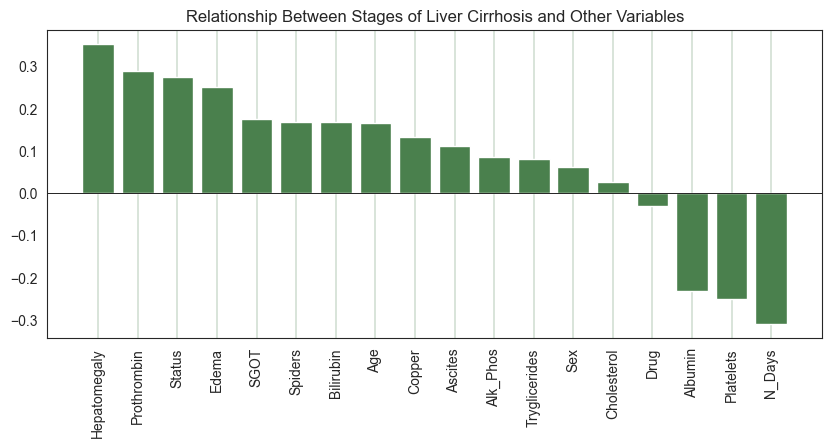

In [50]:
plt.figure(figsize=(10,4))
sns.set_style("white")
plt.bar(x=stage_corr.index, height=stage_corr, color="#4a804d")
plt.xticks(rotation=90)
plt.axhline(0, color="k", lw=0.6)
plt.grid(True, axis="x", lw=0.3, color="#4a804d")
plt.title("Relationship Between Stages of Liver Cirrhosis and Other Variables", fontsize=12)
plt.show()


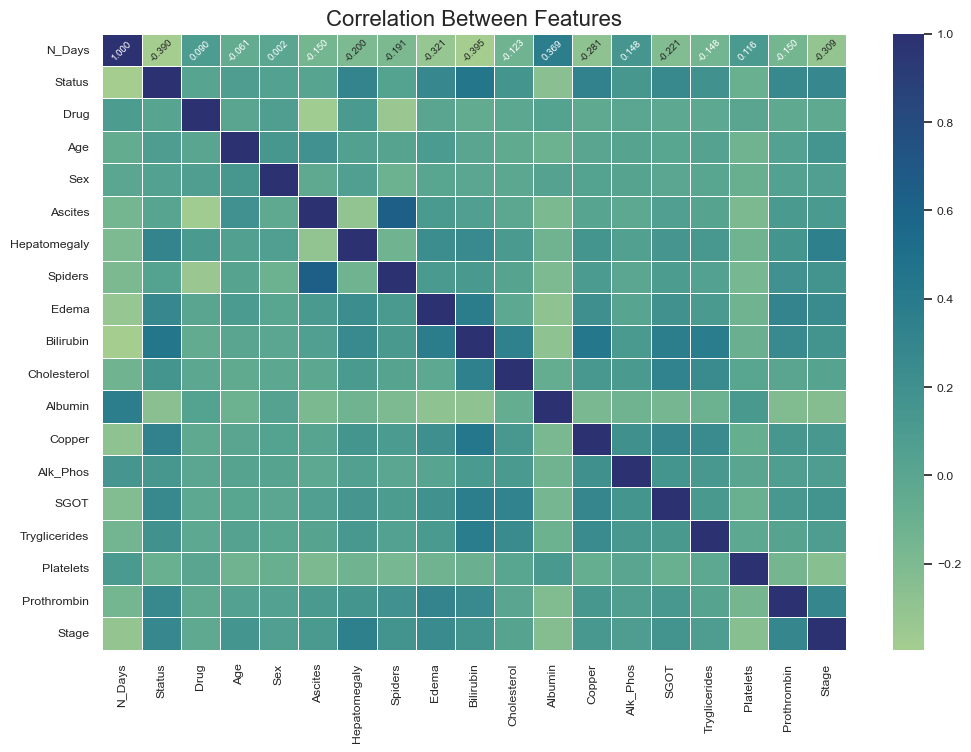

In [51]:
plt.figure(figsize=(12,8))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, linewidths=0.4, fmt='.3f', cmap="crest", annot_kws={'size': 7, 'rotation': 45})
plt.title("Correlation Between Features", fontsize=16)
plt.show()

In [58]:
df['Age_in_years'] = df['Age'] / 365.25
df['Age_in_years'] = df['Age_in_years'].round(2)
df.drop(columns=('Age'), inplace=True)

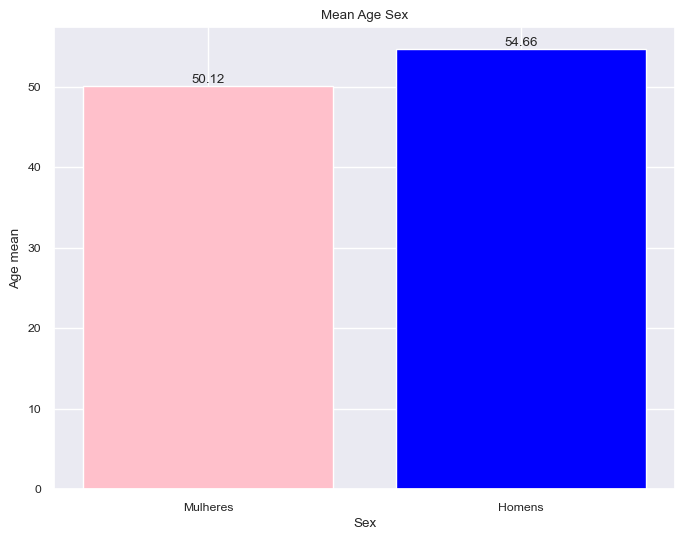

In [59]:
mean_age_female = df[df['Sex'] == 'F']['Age_in_years'].mean()
mean_age_male = df[df['Sex'] == 'M']['Age_in_years'].mean()

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(['Mulheres', 'Homens'], [mean_age_female, mean_age_male], color=['pink', 'blue'])

# Adicionando os valores de idade média nas barras
for bar, age_mean in zip(bars, [mean_age_female, mean_age_male]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{age_mean:.2f}', 
             ha='center', va='bottom')

plt.title('Mean Age Sex')
plt.xlabel('Sex')
plt.ylabel('Age mean')
plt.show()


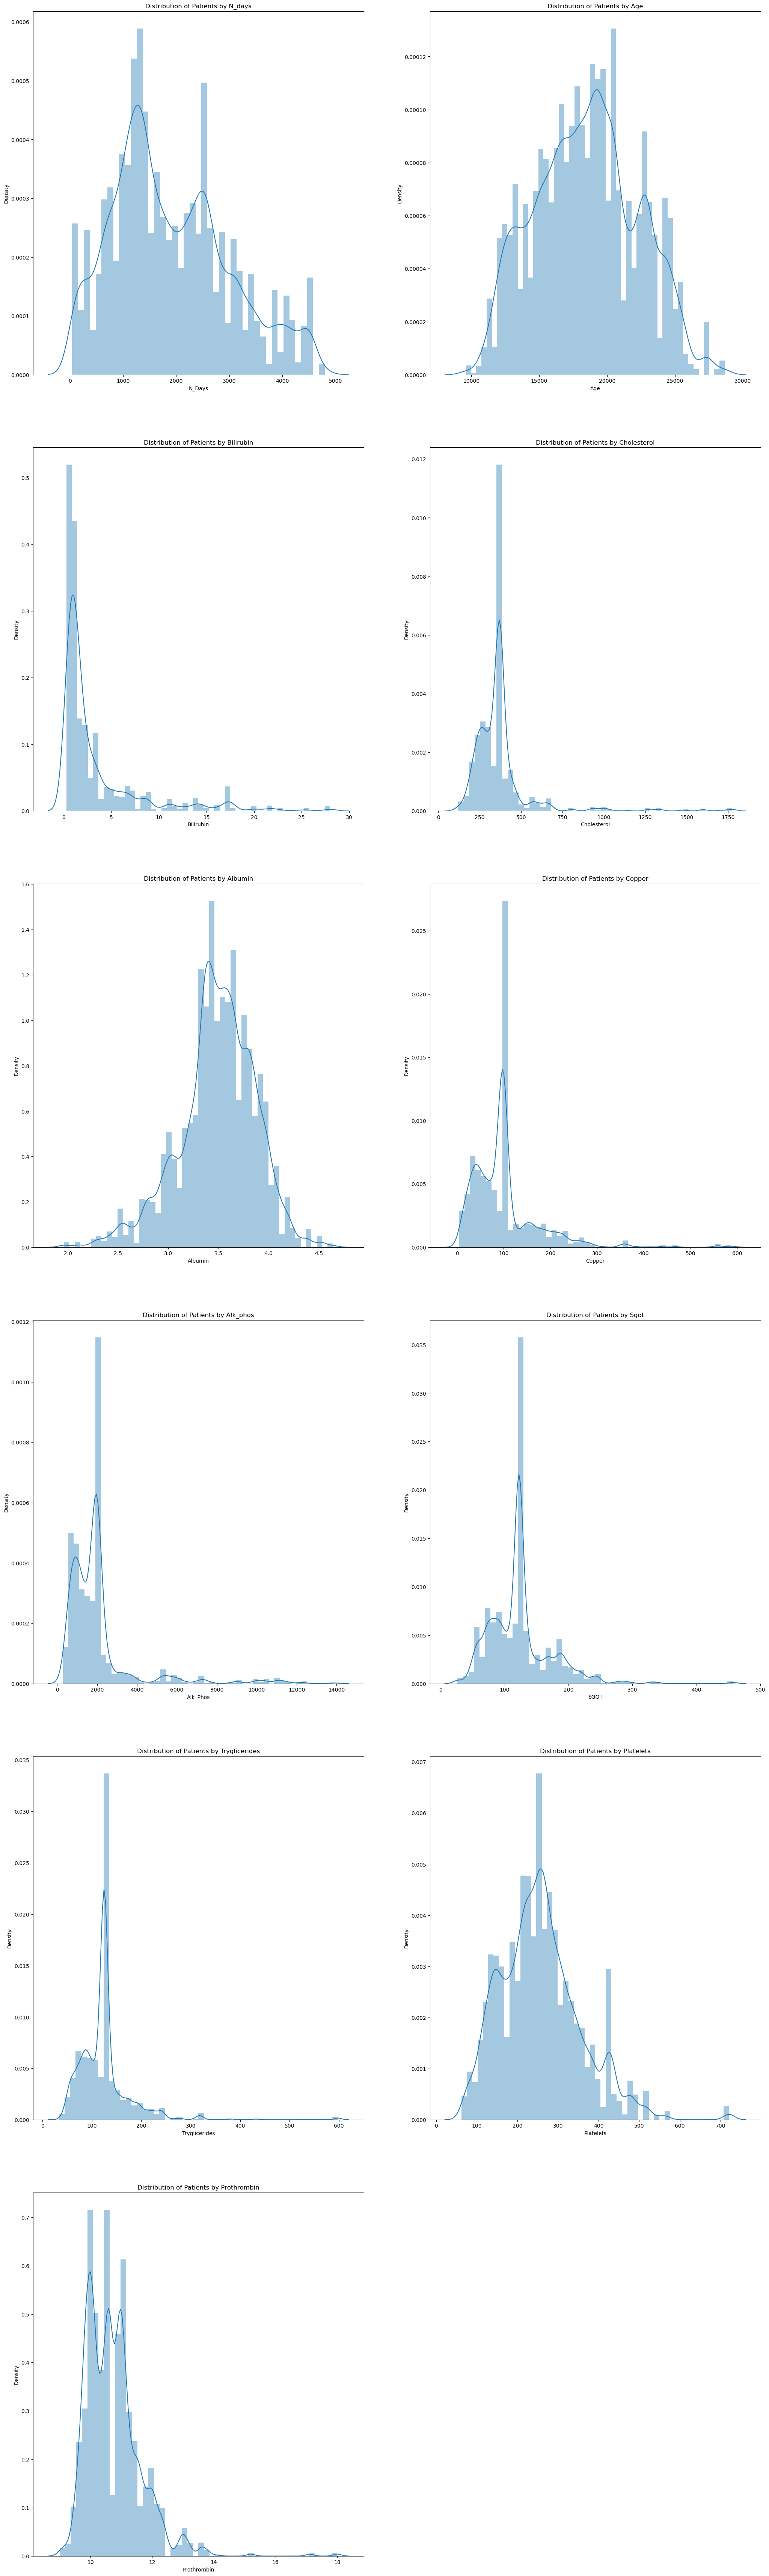

In [17]:
fig, axes = plt.subplots(nrows=round(len(numerical_cols)/2), ncols=2, figsize = (25,8*len(numerical_cols)))

# Iterate through each column and plot a countplot
for i, column in enumerate(numerical_cols):
   
    sns.distplot(df[column], ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(f'Distribution of Patients by {column.capitalize()}')
    
    

# Hide any remaining empty subplots
for j in range(len(numerical_cols), len(axes.flat)):
    axes.flatten()[j].axis('off')

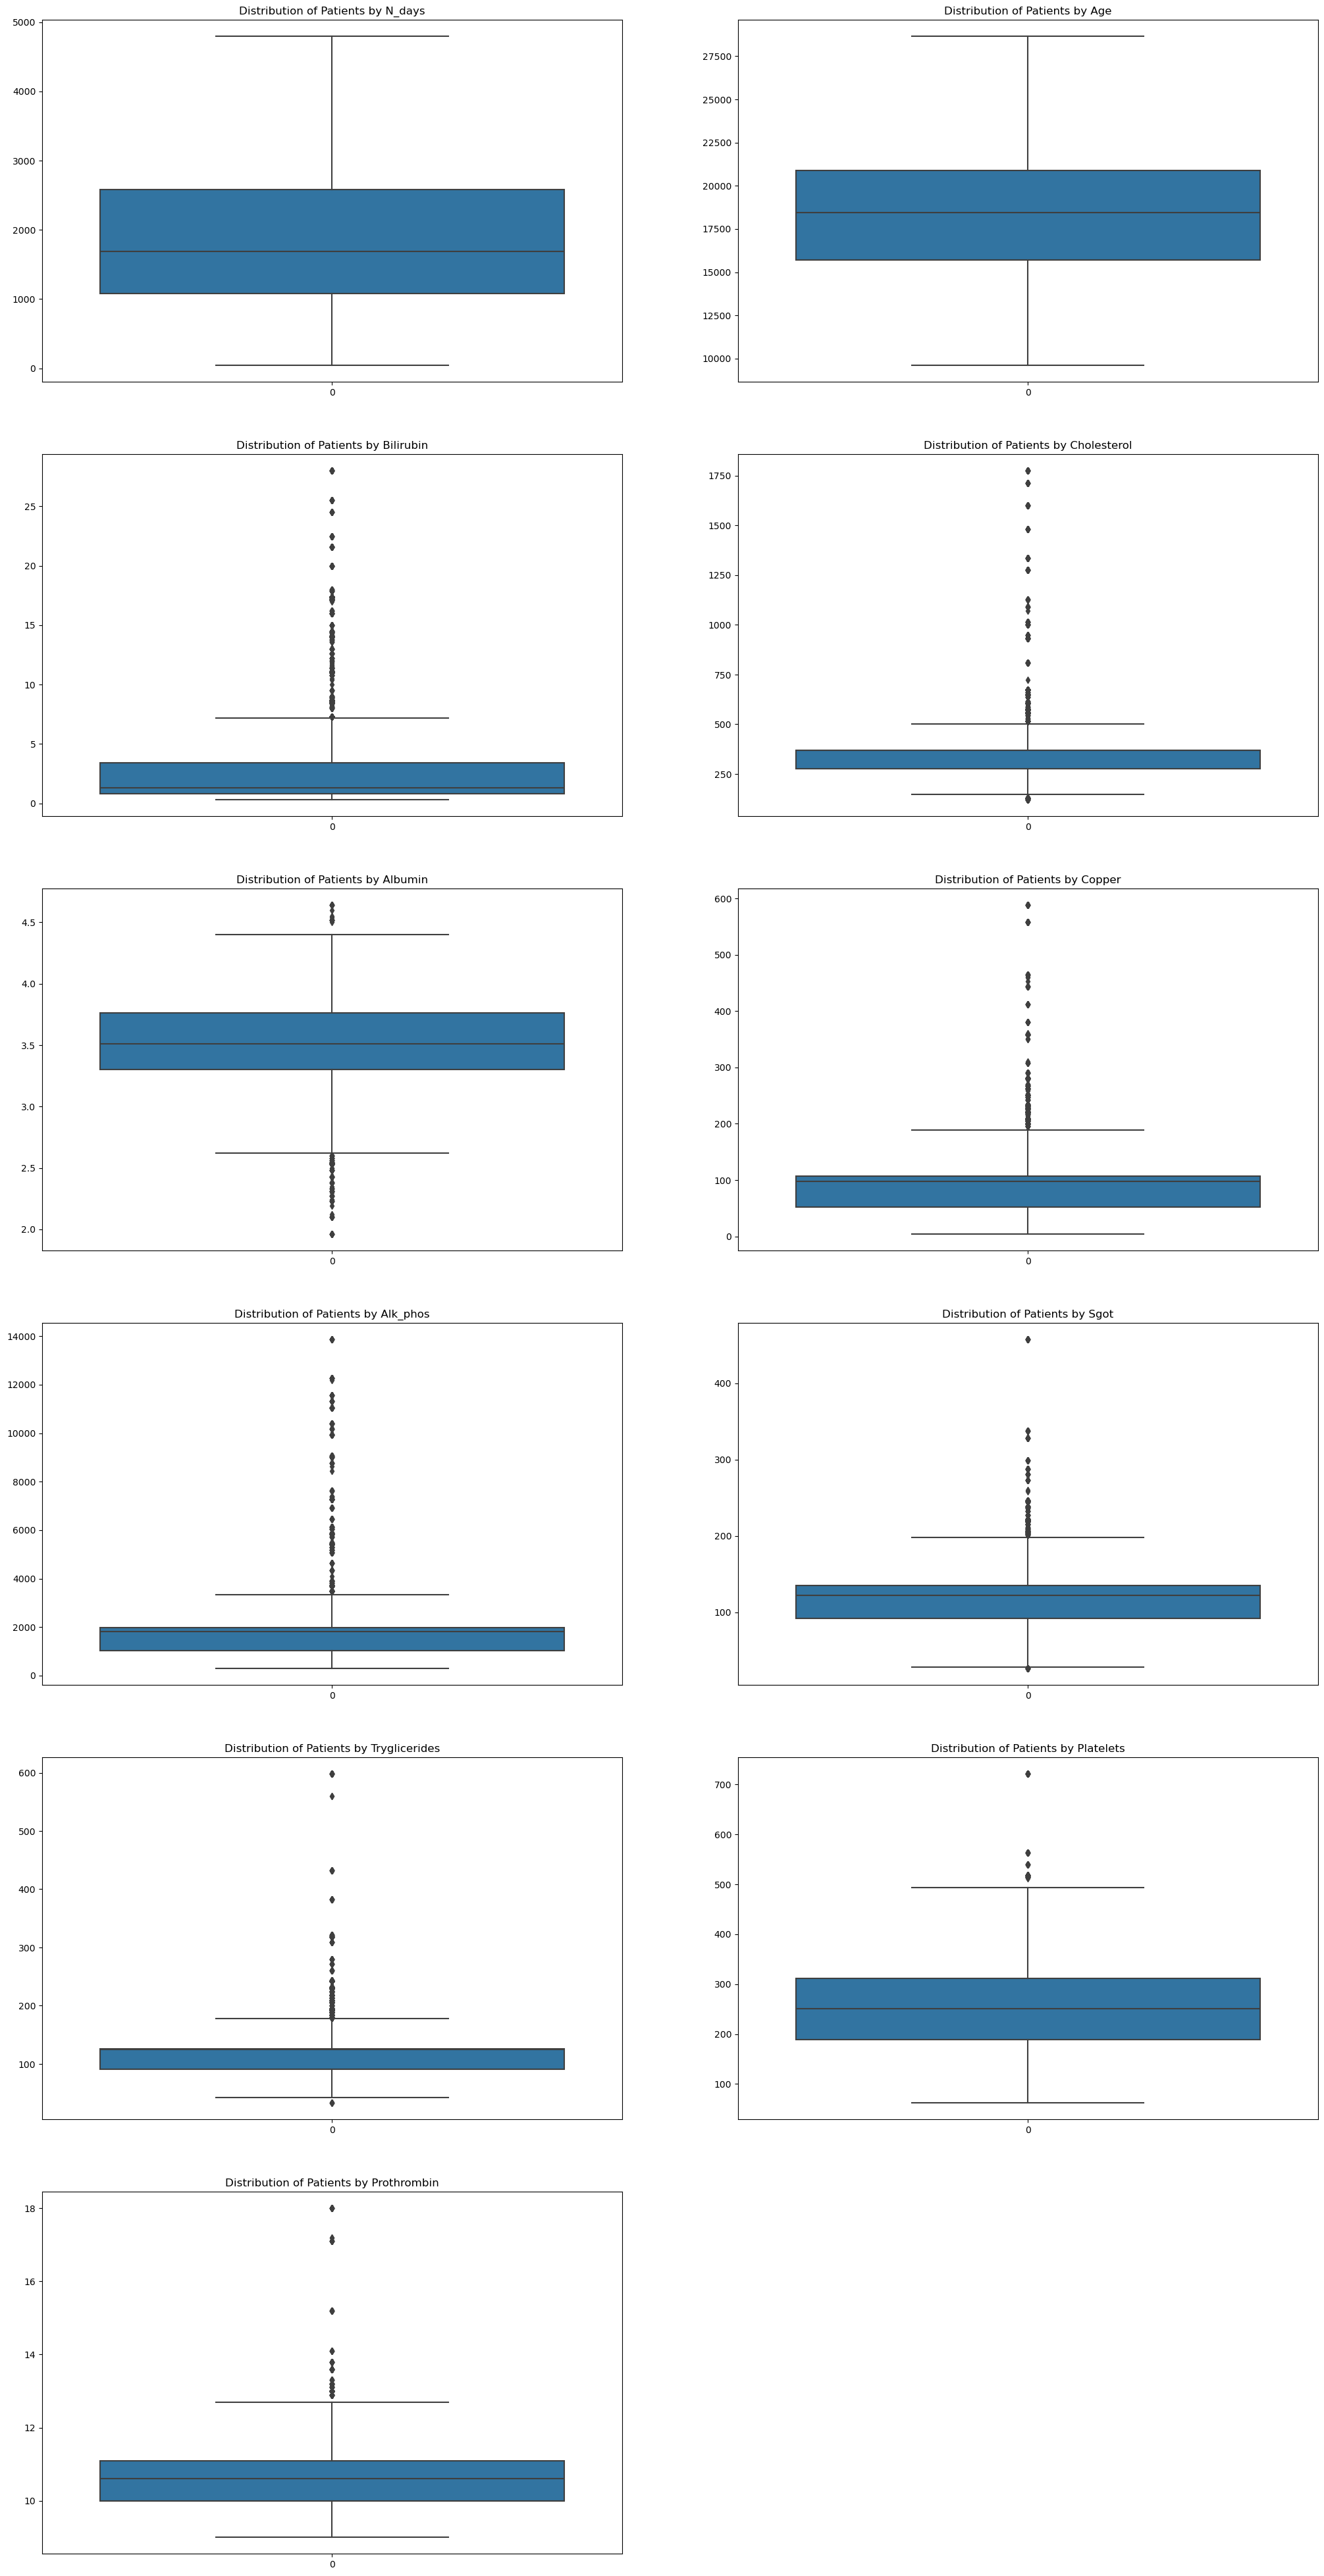

In [19]:
fig, axes = plt.subplots(nrows=round(len(numerical_cols)/2), ncols=2, figsize = (25,50))

# Iterate through each column and plot a countplot
for i, column in enumerate(numerical_cols):
   
    sns.boxplot(df[column],ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(f'Distribution of Patients by {column.capitalize()}')
    
    

# Hide any remaining empty subplots
for j in range(len(numerical_cols), len(axes.flat)):
    axes.flatten()[j].axis('off')

### Basic Feature Manipulation and Multivariate Analysis

In [20]:
#CONVERTING AGE (IN DAYS) TO VALUES IN TERMS OF YEARS

df_copy = df.copy()

#TAKING 4 DECIMAL PLACES TO MAINTAIN PRECISION IN AGE

df_copy['age_yrs'] = round((df_copy['Age']/365), 4)

In [21]:
df_copy.drop(['Age'], axis = 1, inplace = True)
numerical_cols = df_copy.select_dtypes(exclude = 'O').columns.tolist()
categorical_cols = df_copy.select_dtypes('O').columns.tolist()

In [22]:
df_copy.groupby('Stage')[numerical_cols].median()

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,age_yrs
Stage,,,,,,,,,,,
1,2286.0,1.0,369.510563,3.61,97.648387,1692.000000,119.350000,124.702128,271.0,10.4,48.9699
2,1725.0,1.3,369.510563,3.56,97.648387,1794.000000,122.556346,124.702128,253.0,10.4,49.8603
3,1301.0,2.1,369.510563,3.40,97.648387,1982.655769,122.556346,124.702128,214.0,11.0,53.9671


In [23]:
df_copy.groupby('Stage')[numerical_cols].mean()

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,age_yrs
Stage,,,,,,,,,,,
1,2293.985296,2.493938,351.804324,3.553308,87.544823,1779.116555,110.491431,116.887788,285.104649,10.540488,49.247058
2,1924.428043,3.299867,402.468231,3.566971,100.507682,2038.768814,127.086584,126.259024,258.433517,10.498059,49.211951
3,1460.895912,4.410409,362.070160,3.339825,111.205386,2153.125519,130.853336,127.528397,225.232285,11.174427,53.496536


Subjects in higher stage of Liver Cirrhosis have much higher Bilirubin, Copper, Alkaline Phosphatase than those in lower stage.

Those who are older have a greater chance of developing Stage 3 Liver Cirrhosis.

The N_days for Stage 3 subjects is also lower, suggesting more patients in Stage 3 had passed away or had transplantations.

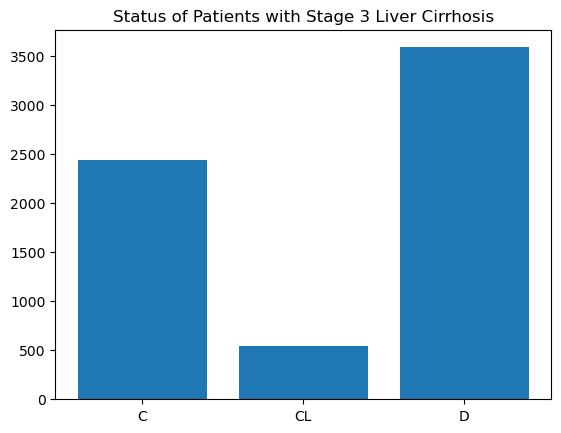

In [24]:
subjects_with_stage_3 = df_copy[df_copy.Stage == 3].groupby('Status').count()

plt.bar(x = subjects_with_stage_3['N_Days'].index, height = subjects_with_stage_3['N_Days'].values)
plt.title('Status of Patients with Stage 3 Liver Cirrhosis')
plt.show()


Most subjects with Liver Cirrhosis Stage 3 passed away during the study and haven't completed the entire timeline of the study.

In [25]:
df_copy.groupby('Sex')[numerical_cols].mean()

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,age_yrs
Sex,,,,,,,,,,,
F,1895.23284,3.389710,372.623298,3.483513,98.642403,1971.747241,122.767925,123.426416,259.257241,10.719454,50.104276
M,1893.69965,3.451051,369.717869,3.519961,107.972397,2130.429655,123.011129,124.541398,234.209648,10.853459,54.738398


In [26]:
df_copy.groupby('Sex')[numerical_cols].median()

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,age_yrs
Sex,,,,,,,,,,,
F,1702.0,1.3,369.510563,3.505,97.648387,1826.0,122.556346,124.702128,255.0,10.6,50.0356
M,1478.0,1.7,369.510563,3.530,97.648387,1919.0,122.556346,124.702128,217.0,10.9,53.3425


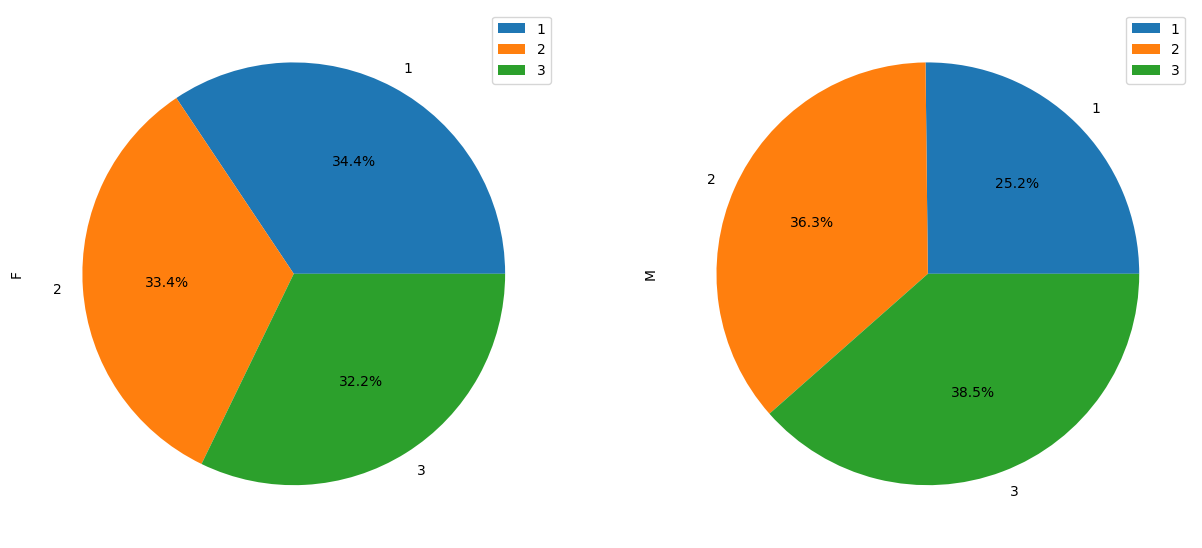

In [27]:
group_by_sex_and_stage = pd.crosstab(df_copy['Stage'],df_copy['Sex'])


group_by_sex_and_stage.plot(kind = 'pie', subplots = True, figsize = (15,15), autopct='%1.1f%%')
plt.show()

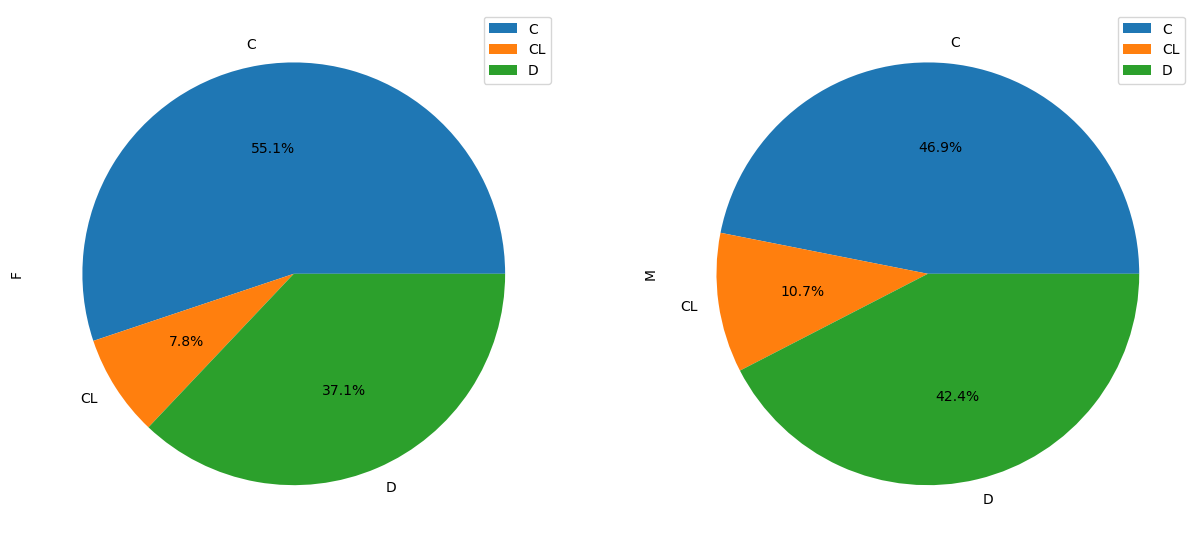

In [28]:
group_by_sex_and_status = pd.crosstab(df_copy['Status'],df_copy['Sex'])


group_by_sex_and_status.plot(kind = 'pie', subplots = True, figsize = (15,15), autopct='%1.1f%%')
plt.show()


The Male Subjects, on average, have greater amount of Copper and Alk_Phos in their bodies. But, Females have more relatively more Platelets on average.

The Male Subjects are 4 years older than the Female subjects on average.

Majority of the Male subjects in the study suffered from Stage 3 Liver Cirrhosis. 39% had Stage 3, only 25% had Stage 1. That's why, Number of Deaths for Male Subjects in this study is greater in terms of percentage.

Female subjects have a more evenly distributed number of Stage 1,2, and 3 cases.

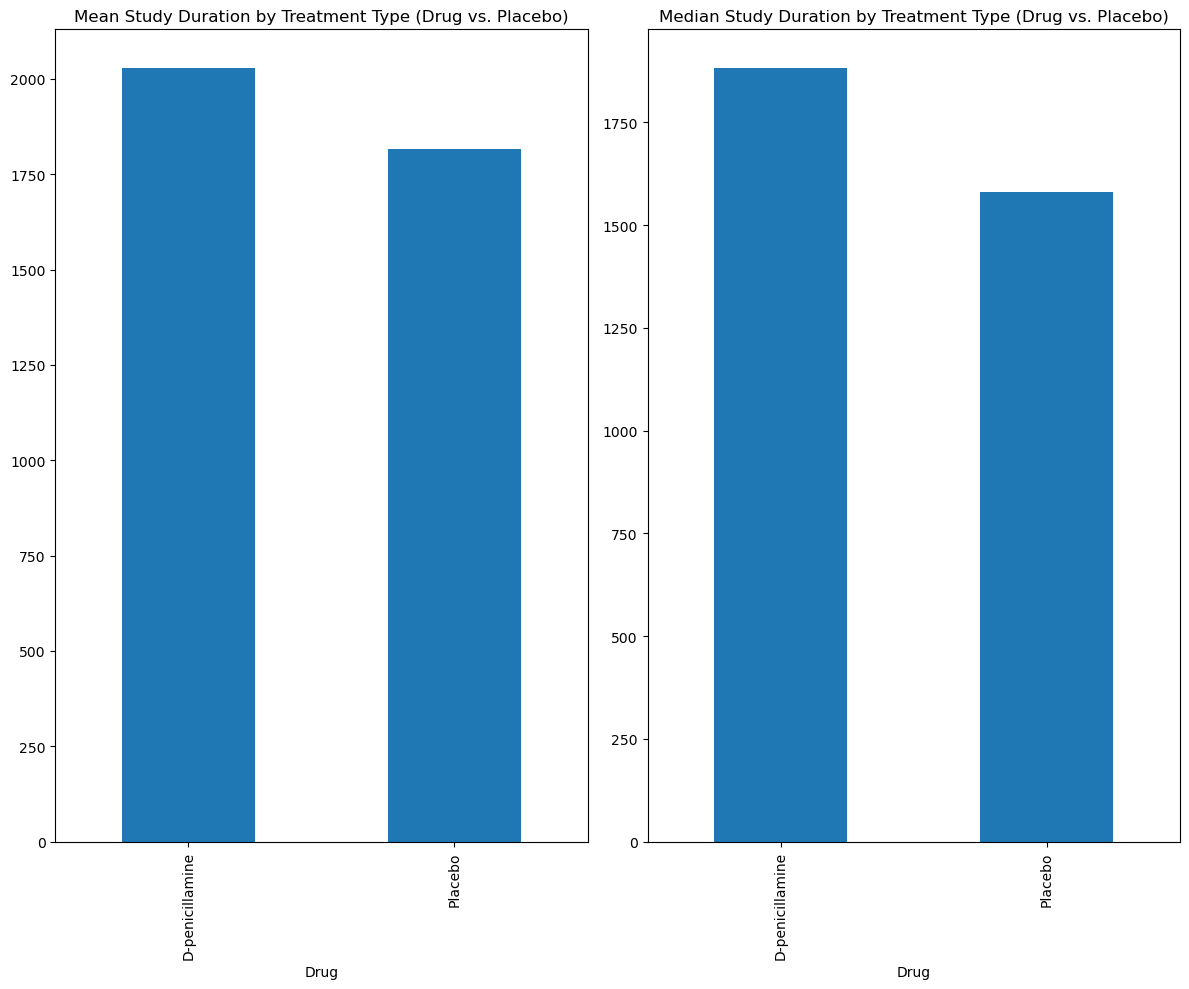

In [29]:
drugs_and_days = df_copy.groupby('Drug')['N_Days']

fig, axes = plt.subplots(1,2, figsize = (12,10))

drugs_and_days.mean().plot(kind = 'bar', ax = axes[0])
axes[0].set_title('Mean Study Duration by Treatment Type (Drug vs. Placebo)')

drugs_and_days.median().plot(kind = 'bar', ax = axes[1])
axes[1].set_title('Median Study Duration by Treatment Type (Drug vs. Placebo)')

plt.tight_layout()
plt.show()

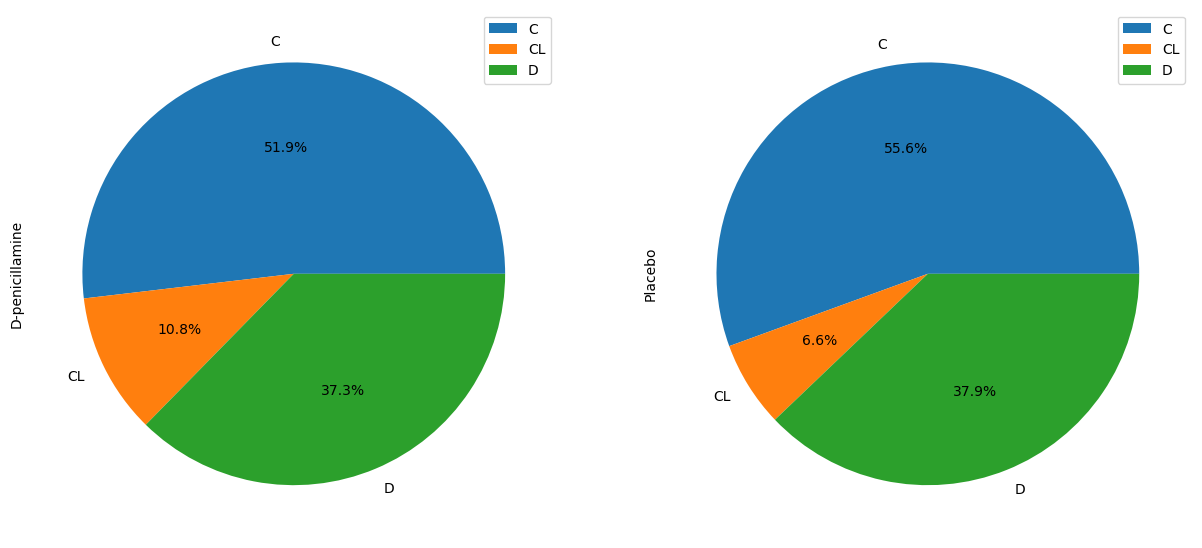

In [30]:
drugs_and_status = pd.crosstab(df_copy['Status'], df_copy['Drug'])

drugs_and_status.plot(kind = 'pie', subplots = True, autopct='%1.1f%%', figsize = (15,15))

plt.show()

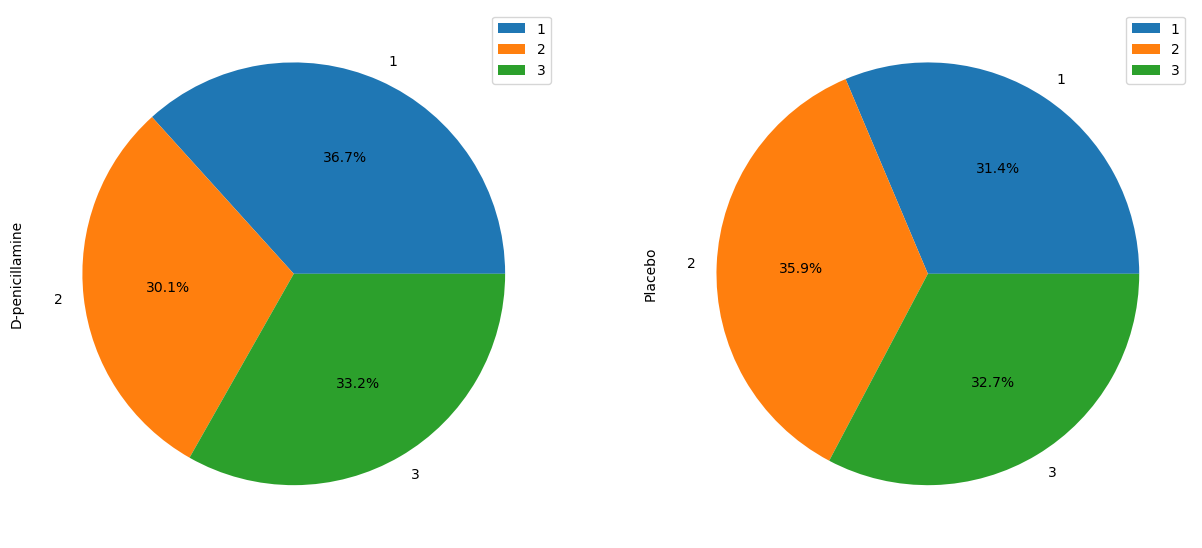

In [31]:
drugs_and_status = pd.crosstab(df_copy['Stage'], df_copy['Drug'])

drugs_and_status.plot(kind = 'pie', subplots = True, autopct='%1.1f%%', figsize = (15,15))

plt.show()

In [32]:
drugs_impact = df_copy.groupby('Drug')[numerical_cols].agg(['mean', 'median'])
drugs_impact.drop('age_yrs', axis = 1)

N_Days         Bilirubin        Cholesterol              \
                        mean  median      mean median        mean      median   
Drug                                                                            
D-penicillamine  2028.625918  1882.0  3.102325    1.3  370.229951  356.000000   
Placebo          1817.384153  1581.0  3.567911    1.3  373.490346  369.510563   

                  Albumin            Copper                Alk_Phos  \
                     mean median       mean     median         mean   
Drug                                                                  
D-penicillamine  3.508907   3.55   97.41969  80.000000  1971.103960   
Placebo          3.475329   3.49  101.03854  97.648387  2000.781032   

                                    SGOT             Tryglicerides  \
                      median        mean      median          mean   
Drug                                                                 
D-penicillamine  1592.000000  121.743467  122.000000    121.779602   
Placebo          1982.655769  123.407600  122.556346    124.585461   

                              Platelets        Prothrombin         
                     median        mean median        mean median  
Drug                                                               
D-penicillamine  121.000000  257.510940  251.0   10.702093   10.6  
Placebo          124.702128  255.748907  251.0   10.753752   10.6

1. Subjects on drugs had higher N_Days than those on Placebo, suggesting that they were part of the study for much longer periods without having Liver Transplants or Death.
2. Subjects on the Drug had lower Cholesterol levels, Bilirubin, and Copper levels.
3. There were no significant impacts on the Prothrombin time.

## Basic Data Preprocessing

In [33]:
X = df_copy.drop(['Stage'], axis =1 )
y = df_copy['Stage']

categorical_cols = X.select_dtypes('O').columns.tolist()
numerical_cols = X.select_dtypes(exclude = 'O').columns.tolist()

In [34]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, categorical_cols),
         ("StandardScaler", numeric_transformer, numerical_cols),        
    ]
)

In [35]:
X_scaled = preprocessor.fit_transform(X)
X_scaled

array([[ 1.        ,  0.        ,  0.        , ...,  1.76179798,
        -0.81510277, -1.01795625],
       [ 0.        ,  0.        ,  1.        , ...,  0.36131613,
        -0.59323281, -0.646132  ],
       [ 0.        ,  0.        ,  1.        , ..., -0.40996372,
         1.84733676,  0.29107058],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.16304125,
        -0.70416779,  1.21432975],
       [ 1.        ,  0.        ,  0.        , ..., -0.28818269,
        -0.48229783,  0.76208383],
       [ 0.        ,  0.        ,  1.        , ..., -1.06961097,
         1.40359684,  1.88533552]])

**NOTE:** Based on the domain (healthcare), the dataset's outliers and extreme Numerical feature values are equally important to normal data for Liver Cirrhosis Stage Classification. That's why, the outliers are not eliminated and the data are kept consistent with the original dataset.

# Cluster Analysis

In [3]:
categoricals = ["Status", "Drug", "Sex", "Ascites", "Hepatomegaly",
               "Spiders", "Edema"]

In [9]:
numericals = [i for i in df.columns if i not in categoricals]
numericals = ['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']
print(numericals)

['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']


In [10]:
df = pd.read_csv("liver_cirrhosis.csv")

In [11]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [12]:
# Remove duplicate rows from the dataframe
df = df.drop_duplicates()

# Verify the number of rows after removing duplicates
num_rows_after_removal = df.shape[0]
print(f"Number of rows after removing duplicates: {num_rows_after_removal}")

Number of rows after removing duplicates: 9639


In [13]:
df["Status"] = df["Status"].map({"C":0, "CL":1, "D":2})
df["Drug"] = df["Drug"].map({"Placebo":0, "D-penicillamine":1})
df["Sex"] = df["Sex"].map({"F":0, "M":1})
df["Ascites"] = df["Ascites"].map({"N":0, "Y":1})
df["Hepatomegaly"] = df["Hepatomegaly"].map({"N":0, "Y":1})
df["Spiders"] = df["Spiders"].map({"N":0, "Y":1})
df["Edema"] = df["Edema"].map({"N":0, "S":1, "Y":2})

In [14]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns
# Filter out all warnings
warnings.filterwarnings('ignore')

In [15]:
X= df.drop(columns=['Stage'])
Y = df['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
x_train

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
4076,1434,0,1,11058,0,0,1,1,1,1.0,317.0,3.56,44.0,1636.0,84.00,111.0,493.0,9.8
443,3839,2,0,17246,0,0,1,0,0,4.7,296.0,3.47,114.0,9933.2,206.40,101.0,225.0,11.5
13484,4149,0,0,20254,0,0,0,0,0,0.7,578.0,3.57,35.0,1353.0,127.10,105.0,277.0,10.4
5184,3255,0,1,15526,0,0,0,1,0,0.5,268.0,2.88,9.0,1174.0,86.80,95.0,251.0,11.0
13840,2318,0,0,16714,1,0,0,0,0,4.7,236.0,3.55,112.0,1391.0,137.95,114.0,207.0,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,1487,2,0,22977,0,0,1,0,0,2.1,370.0,3.50,52.0,7277.0,150.35,158.0,178.0,11.0
209,3445,2,0,20684,0,0,1,0,0,2.0,267.0,3.67,89.0,754.0,196.85,90.0,269.0,9.7
1394,2224,2,0,18628,0,1,0,1,0,0.8,329.0,3.50,49.0,746.0,126.42,124.0,286.0,10.6
10126,2272,0,1,22514,0,0,0,0,0,0.5,223.0,3.80,15.0,1044.0,80.60,59.0,514.0,10.0


### Overall Outlier Checking

In [17]:
from sklearn.ensemble import IsolationForest

In [18]:
clf = IsolationForest(contamination=0.05)
clf.fit(x_train)
predictions = clf.predict(x_train)

In [19]:
sum(predictions==1)

7325

In [20]:
sum(predictions==-1)

386

In [21]:
sum(predictions==-1)/sum(predictions==1)

0.052696245733788394

### Clustering

### Kmeans

  File "c:\Users\Tharindu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Tharindu\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Tharindu\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Tharindu\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


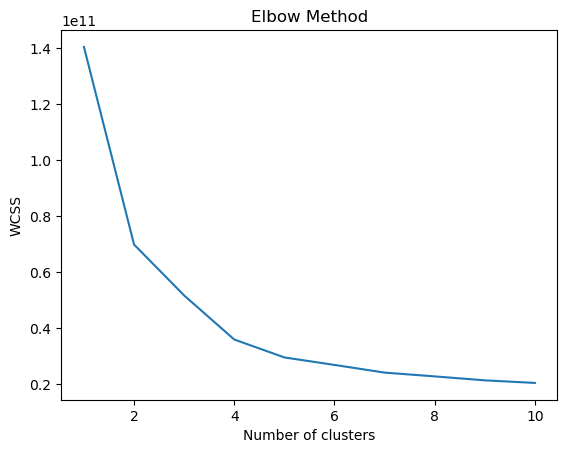

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_train)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

The average silhouette score is: 0.4062821603268496


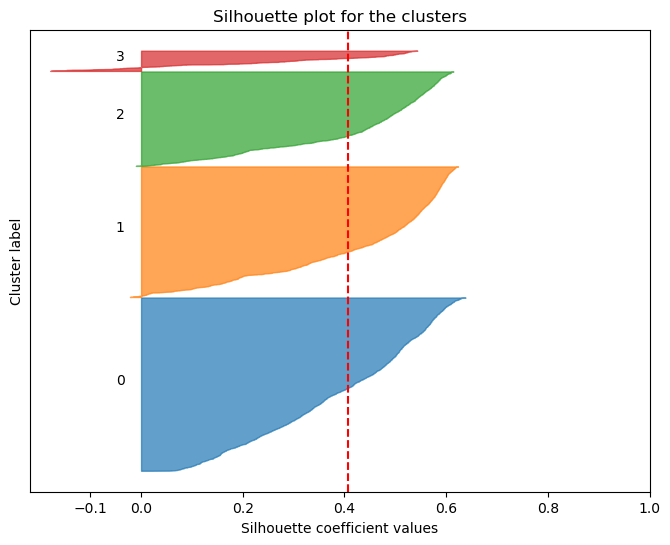

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_train)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
silhouette_avg = silhouette_score(x_train, cluster_labels)
print("The average silhouette score is:", silhouette_avg)


sample_silhouette_values = silhouette_samples(x_train, cluster_labels)


fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)


cluster_colors = sns.color_palette('tab10', n_colors=4)

y_lower = 10
for i in range(4):  
    
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    
    y_lower = y_upper + 10  

ax1.set_title("Silhouette plot for the clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")


ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [25]:
# Count the number of observations in each cluster
cluster_counts = np.bincount(cluster_labels)

# Print the number of observations in each cluster
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} observations")

Cluster 0: 3192 observations
Cluster 1: 2406 observations
Cluster 2: 1740 observations
Cluster 3: 373 observations


In [26]:
# Initialize lists to store proportions for each cluster
proportions_1s = []
proportions_2s = []
proportions_3s = []

# Iterate over each cluster
for cluster_label in range(4):  # Assuming there are 4 clusters
    # Filter y_test based on the cluster label
    y_test_cluster = y_train[cluster_labels == cluster_label]
    
    # Count the number of occurrences of 0s and 1s in y_test_cluster
    y_test_cluster_counts = np.bincount(y_test_cluster)
    
    # Calculate the proportion of 0s and 1s
    total_samples_cluster = len(y_test_cluster)
    proportion_1s = y_test_cluster_counts[1] / total_samples_cluster
    proportion_2s = y_test_cluster_counts[2] / total_samples_cluster
    proportion_3s = y_test_cluster_counts[3] / total_samples_cluster
    
    # Append proportions to the lists
    proportions_1s.append(proportion_1s)
    proportions_2s.append(proportion_2s)
    proportions_3s.append(proportion_3s)

# Print proportions for each cluster
for i in range(4):  # Assuming there are 4 clusters
    print(f"Cluster {i}: Proportion of 1s = {proportions_1s[i]}, Proportion of 2s = {proportions_2s[i]}, Proportion of 3s = {proportions_3s[i]}")


Cluster 0: Proportion of 1s = 0.31547619047619047, Proportion of 2s = 0.34899749373433586, Proportion of 3s = 0.3355263157894737
Cluster 1: Proportion of 1s = 0.3399833748960931, Proportion of 2s = 0.38985868661679135, Proportion of 3s = 0.27015793848711556
Cluster 2: Proportion of 1s = 0.28218390804597704, Proportion of 2s = 0.26091954022988506, Proportion of 3s = 0.45689655172413796
Cluster 3: Proportion of 1s = 0.2520107238605898, Proportion of 2s = 0.34584450402144773, Proportion of 3s = 0.40214477211796246


### KMedioid

In [27]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


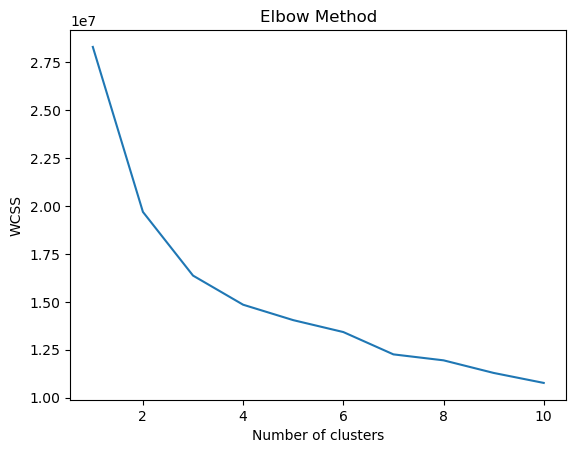

The average silhouette score is: 0.29952031885432034


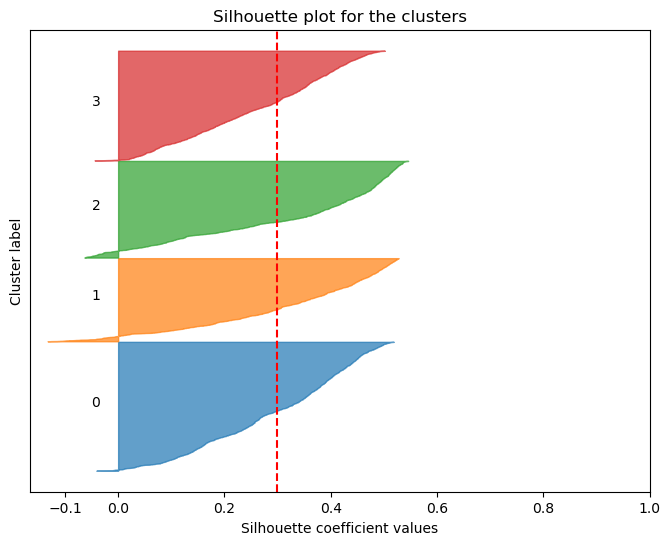

In [28]:
from sklearn_extra.cluster import KMedoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    kmedoids.fit(x_train)
    wcss.append(kmedoids.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmedoids = KMedoids(n_clusters=4, random_state=42)
kmedoids.fit(x_train)
cluster_labels = kmedoids.labels_

silhouette_avg = silhouette_score(x_train, cluster_labels)
print("The average silhouette score is:", silhouette_avg)

sample_silhouette_values = silhouette_samples(x_train, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

cluster_colors = sns.color_palette('tab10', n_colors=4)

y_lower = 10
for i in range(4):  
    
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

ax1.set_title("Silhouette plot for the clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [30]:
# Initialize lists to store proportions for each cluster
proportions_1s = []
proportions_2s = []
proportions_3s = []

# Iterate over each cluster
for cluster_label in range(4):  # Assuming there are 4 clusters
    # Filter y_test based on the cluster label
    y_test_cluster = y_train[cluster_labels == cluster_label]
    
    # Count the number of occurrences of 0s and 1s in y_test_cluster
    y_test_cluster_counts = np.bincount(y_test_cluster)
    
    # Calculate the proportion of 0s and 1s
    total_samples_cluster = len(y_test_cluster)
    proportion_1s = y_test_cluster_counts[1] / total_samples_cluster
    proportion_2s = y_test_cluster_counts[2] / total_samples_cluster
    proportion_3s = y_test_cluster_counts[3] / total_samples_cluster
    
    # Append proportions to the lists
    proportions_1s.append(proportion_1s)
    proportions_2s.append(proportion_2s)
    proportions_3s.append(proportion_3s)

# Print proportions for each cluster
for i in range(4):  # Assuming there are 4 clusters
    print(f"Cluster {i}: Proportion of 1s = {proportions_1s[i]}, Proportion of 2s = {proportions_2s[i]}, Proportion of 3s = {proportions_3s[i]}")


Cluster 0: Proportion of 1s = 0.3164983164983165, Proportion of 2s = 0.31902356902356904, Proportion of 3s = 0.36447811447811446
Cluster 1: Proportion of 1s = 0.25718015665796345, Proportion of 2s = 0.2800261096605744, Proportion of 3s = 0.46279373368146215
Cluster 2: Proportion of 1s = 0.3254769921436588, Proportion of 2s = 0.38496071829405165, Proportion of 3s = 0.2895622895622896
Cluster 3: Proportion of 1s = 0.3384463137060861, Proportion of 2s = 0.3770410687778328, Proportion of 3s = 0.28451261751608115
